In [40]:
from textblob import TextBlob
import pandas as pd
import numpy as np
import os
import re

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

In [38]:
# choose a lexicon based sentiment classifier for ever comment with Co-occurrance. Possibly compare
# more than one classifier, described below.

In [6]:
df = pd.read_csv('cooccurrence_df.csv')

C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\4094576898.py:1: DtypeWarning: Columns (56) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cooccurrence_df.csv')


### upload city dictionary for locating toponym

In [8]:
city_variation_df = pd.read_csv('city_variations.csv')
city_variation_df = city_variation_df[:39]

cols = ['eng', 'local', 'wiki', 'col']
city_dict = {}
for i, row in city_variation_df.iterrows():    
    city_dict[row['col']] = [row['eng'], row['local'], row['wiki']]

## PARIS

In [9]:
df = pd.read_csv('cooccurrence_df.csv')

city_variation_df = pd.read_csv('city_variations.csv')
city_variation_df = city_variation_df[:39]

#remove cities with <1million population
df = df[df['Paris']==1]
cols1 = ['doc','line', 'created_utc', ' score',' subreddit',' link_id',' subreddit_id']
cols2 = list(city_variation_df['col'])
cols = cols1 + cols2
df = df[cols]


C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\3295978081.py:1: DtypeWarning: Columns (56) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cooccurrence_df.csv')


#### create year and month columns

In [10]:
df['year'] = df['doc'].apply(lambda x: int(x[:4]))
df['month'] = df['doc'].apply(lambda x: int(x[5:]))

#### add body

In [11]:
path = r"C:\Users\kodri\Desktop\CITYNET Europe\occurrances"
body = []
doc = df.iloc[0]['doc']
file = "RC_" + doc + '.txt'
fp = os.path.join(path, file)
with open(fp, 'r', encoding = 'utf-8') as f:
    comments = f.read().split('\n--------\n')
    
for idx, row in df.iterrows():

    if row['doc'] == doc:
        line = row['line']
        text = comments[line].split(',')[-2]
        body.append(text)
    else:
        doc = row['doc']
        file = "RC_" + doc + '.txt'
        fp = os.path.join(path, file)
        with open(fp, 'r', encoding = 'utf-8') as f:
            comments = f.read().split('\n--------\n')
            line = row['line']
            text = comments[line].split(',')[-2]
            body.append(text)

df['body'] = body

In [ ]:
#identify comments containing 'paris hilton'
df['hilton'] = df['body'].apply(lambda x: 1 if 'paris hilton' in x.lower() else 0)
positive = df[df['hilton']==1].index
negative = df[df['hilton']==0].sample(len(positive), random_state=12).index
index = list(positive)+list(negative)
index.sort()
df = df.loc[index]

#### remove punctuation

In [20]:
# remove punctuation from df['body']
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

df['body'] = df['body'].apply(lambda x: clean(x))

#### identify toponym index

In [22]:
sentence_idx = []
for blob in df['blob']:
    idx = []
    for i, s in enumerate(blob.sentences):
        if 'paris' in s.lower():
            idx.append(i)
            
    sentence_idx.append(idx)

df['sent_idx'] = sentence_idx

#### reformat rows - one per sentence w/ occurrence

In [26]:
for idx, row in df.iterrows():
    if len(row['sent_idx'])>1:
        for j in row['sent_idx']:
            new_row = row.copy()
            new_row['sent_idx'] = j
            df = df.append(new_row)

C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.appe

C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.appe

C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.appe

C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.appe

C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.appe

C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.appe

C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.appe

C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.appe

C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\1021320585.py:6: FutureWarning: The frame.appe

In [27]:
#remove the rows with multiple sentence occurrences now that there is a row for each sentence
num_sentences = []
for idx, row in df.iterrows():
    if type(row['sent_idx']) == list:
        num_sentences.append(len(row['sent_idx']))
    else:
        num_sentences.append(1)

df['num_sent_occ'] = num_sentences

In [137]:
df = df[df['num_sent_occ']==1][cols]

#### Index sentences and get sentence sentiment 

In [34]:
sent_idx = []
for i, row in df.iterrows():
    if type(row['sent_idx'])==list:
        sent_idx.append(row['sent_idx'][0])
    else:
        sent_idx.append(row['sent_idx'])
df['sent_idx'] = sent_idx

C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\3859000276.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sent_idx'] = sent_idx


In [ ]:
comment = df['body'].iloc[10]
sid_obj= SentimentIntensityAnalyzer()
print(sid_obj.polarity_scores(comment)) 

In [51]:
#for each sentence with a toponym occurrence calculate sentiment and calculate comment average if more than 1 occurrence
sent_pol = []
sent_sub = []
vader_compound = []
sid_obj= SentimentIntensityAnalyzer()

for idx, row in df.iterrows():
    index = row['sent_idx']
    pol = []
    sub = []
    sentence = row['blob'].sentences[index]
    pol = sentence.sentiment[0]
    sub = sentence.sentiment[1]
    comp = sid_obj.polarity_scores(sentence)['compound']
    sent_pol.append(pol)
    sent_sub.append(sub)
    vader_compound.append(comp)

In [52]:
df['sent_pol'] = sent_pol
df['sent_sub'] = sent_sub
df['vader_compound'] = vader_compound

C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\984253700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sent_pol'] = sent_pol
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\984253700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sent_sub'] = sent_sub
C:\Users\kodri\AppData\Local\Temp\ipykernel_41796\984253700.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [37]:
#tut: https://github.com/shubhamjn1/TextBlob/blob/master/Textblob.ipynb
#TextBlob based on NLTK
# also https://www.analyticsvidhya.com/blog/2021/01/sentiment-analysis-vader-or-textblob/

## K-means 

In [284]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import re

from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

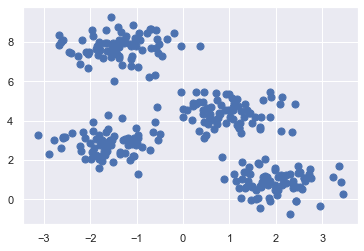

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
import nltk
nltk.download('omw-1.4')

def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column
clean_text = clean(text)

In [ ]:
# POS tagger dictionary
import time 
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist
start = time.time()
for i in range (1000):
    a = token_stop_pos(clean_text)

end = time.time()

print(end-start)
print('seconds')

## Random Undersampling

#### Simple n-gram

In [39]:
def token_to_string(tokens):
    comment = ''
    for word in tokens:
        comment = comment + word + ' '

    return comment

In [140]:
model_df

,index,created_utc,London,Madrid,Berlin,Milan_merged,Barcelona,Athens_merged,Roma_merged,Birmingham,...,Dublin,Helsinki,Amsterdam,Rotterdam,Düsseldorf,year,polarity,subjectivity,sent_pol,sent_sub
0,0,1162537894,0,0,0,1,0,0,0,0,...,0,0,0,0,0,2006,0.000000,0.000000,0.000000,0.000000
1,1,1183547054,1,0,0,0,0,0,0,0,...,0,0,0,0,0,2007,0.092104,0.414374,0.029018,0.214286
2,2,1188381601,1,0,0,0,0,0,0,0,...,0,0,0,0,0,2007,0.500000,1.000000,0.500000,1.000000
3,3,1188383541,1,0,0,0,0,0,0,0,...,0,0,0,0,0,2007,0.500000,1.000000,0.500000,1.000000
4,4,1210950788,1,0,0,0,0,0,0,0,...,0,0,0,0,0,2008,0.000000,0.206250,0.000000,0.112500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,1134,1609203455,0,0,0,0,0,0,0,0,...,0,0,1,0,0,2020,0.041667,0.348148,-0.125000,0.375000
1135,1135,1608989560,1,0,0,0,0,0,0,0,...,0,0,0,0,0,2020,0.047222,0.311111,0.000000,0.000000
1136,1136,1608989560,1,0,0,0,0,0,0,0,...,0,0,0,0,0,2020,0.047222,0.311111,0.083333,0.166667
1137,1137,1610781758,0,0,0,0,0,0,1,0,...,0,0,0,0,0,2021,0.058533,0.359144,-0.600000,0.900000


In [ ]:
#lemmatize, remove enlgish and french stopwords, index paris, get max +-2 words if available
model_df = df.copy().reset_index()
sentences = []
n_grams = []
not_found = []
for i in model_df.index:
    sentence = model_df.loc[i]['blob'].sentences[df.iloc[i]['sent_idx']]
    try:
        tokens = set(sentence.words)
        stop=set(stopwords.words("english", "french"))
        sw = tokens.intersection(stop)
        processed_text = [word.lemmatize().lower() for word in sentence.words if word not in sw]
        paris_index = processed_text.index('paris')
        
        end = len(processed_text)
        l1 = [i for i in range(0,end)]
        l2 = [i for i in range(paris_index-5, paris_index+5)]
        word_idx = [i for i in l2 if i in l1]
        n_gram = [processed_text[i] for i in word_idx]
        comment = ''
        for word in n_gram:
            comment = comment + ' ' + word
        sentences.append(sentence)
        n_grams.append(comment)
        
    #there were a few exceptions in which 'paris' was not found. 
    except ValueError:
        
        sentence = TextBlob(model_df.loc[i]['body'].replace('.',' ').replace('-',' '))
        
        
        tokens = set(sentence.words)
        stop=set(stopwords.words("english", "french"))
        sw = tokens.intersection(stop)
        processed_text = [word.lemmatize().lower() for word in sentence.words if word not in sw]
        paris_index = processed_text.index('paris')
        
        end = len(processed_text)
        l1 = [i for i in range(0,end)]
        l2 = [i for i in range(paris_index-5, paris_index+5)]
        word_idx = [i for i in l2 if i in l1]
        n_gram = [processed_text[i] for i in word_idx]
        comment = ''
        for word in n_gram:
            comment = comment + ' ' + word
        sentences.append(sentence)
        n_grams.append(comment)

model_df['ngram'] = n_grams
model_df['sentence_text'] = sentences

In [112]:
#note: emoji's are included in n-grams
columns = ['doc', 'line', 'created_utc', ' score',
       ' subreddit', ' link_id', ' subreddit_id', 'Paris', 'London', 'Madrid',
       'Berlin', 'Milan_merged', 'Barcelona', 'Athens_merged', 'Roma_merged',
       'Birmingham', 'Lisboa_merged', 'Naples_merged', 'Katowice',
       'Manchester', 'Hamburg', 'Budapest', 'Bucuresti_merged',
       'Warsaw_merged', 'Stuttgart', 'Vienna_merged', 'Munich_merged',
       'Brussels', 'Stockholm', 'Frankfurt am Main', 'Cologne_merged',
       'Copenhagen_merged', 'Valencia', 'Torino_merged', 'Glasgow', 'Lyon',
       'Prague_merged', 'Sofia', 'Liverpool', 'Porto', 'Sevilla_merged',
       'Dublin', 'Helsinki', 'Amsterdam', 'Rotterdam', 'Düsseldorf', 'year',
       'month', 'body', 'blob', 'num_sentences', 'polarity', 'subjectivity',
       'sent_idx', 'sent_pol', 'sent_sub', 'hilton', 'ngram',
       'sentence_text']

#### prep model_df

In [130]:
#drop Katowice, Frankfurt (nans)
model_x_cols = ['created_utc',  'London', 'Madrid',
       'Berlin', 'Milan_merged', 'Barcelona', 'Athens_merged', 'Roma_merged',
       'Birmingham', 'Lisboa_merged', 'Naples_merged', 
       'Manchester', 'Hamburg', 'Budapest', 'Bucuresti_merged',
       'Warsaw_merged', 'Stuttgart', 'Vienna_merged', 'Munich_merged',
       'Brussels', 'Stockholm', 'Cologne_merged',
       'Copenhagen_merged', 'Valencia', 'Torino_merged', 'Glasgow', 'Lyon',
       'Prague_merged', 'Sofia', 'Liverpool', 'Porto', 'Sevilla_merged',
       'Dublin', 'Helsinki', 'Amsterdam', 'Rotterdam', 'Düsseldorf', 'year','polarity', 'subjectivity',
        'sent_pol', 'sent_sub']

#normalize
df = model_df[model_x_cols]

normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df

#score had to be removed because there was a row with a non-int dtype()

,created_utc,London,Madrid,Berlin,Milan_merged,Barcelona,Athens_merged,Roma_merged,Birmingham,Lisboa_merged,...,Dublin,Helsinki,Amsterdam,Rotterdam,Düsseldorf,year,polarity,subjectivity,sent_pol,sent_sub
0,0.023398,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.484848,0.000000,0.500000,0.000000
1,0.069037,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.066667,0.540669,0.414374,0.514509,0.214286
2,0.079539,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.066667,0.787879,1.000000,0.750000,1.000000
3,0.079543,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.066667,0.787879,1.000000,0.750000,1.000000
4,0.128566,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.133333,0.484848,0.206250,0.500000,0.112500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,0.993696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.933333,0.510101,0.348148,0.437500,0.375000
1135,0.993231,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.933333,0.513468,0.311111,0.500000,0.000000
1136,0.993231,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.933333,0.513468,0.311111,0.541667,0.166667
1137,0.997125,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.520323,0.359144,0.200000,0.900000


#### TF-IDF

In [103]:
#drop 'eng_clean' nan values that were 
corpus = model_df['ngram']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
#X.todense() prints the vectorized tf-idf matrix
X.todense()[0].shape

(1, 2935)

In [117]:
#80% of variance
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.80)
pca.fit(X.todense())
reduced = pca.transform(X.todense())
tfidf_df = pd.DataFrame(reduced)

C:\Users\kodri\anaconda3\envs\citynet\lib\site-packages\sklearn\utils\validation.py:723: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\kodri\anaconda3\envs\citynet\lib\site-packages\sklearn\utils\validation.py:723: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [116]:
Y = model_df['hilton']

In [135]:
cols = ['created_utc',
        'sent_pol', 'sent_sub']

In [151]:
a = pd.concat([normalized_df[cols], tfidf_df], axis=1)

In [7]:
X = pd.read_csv('kmeans_MODEL1.csv')

In [119]:
X.to_csv('kmeans_MODEL1.csv')

In [137]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

C:\Users\kodri\anaconda3\envs\citynet\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\kodri\anaconda3\envs\citynet\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


KMeans(n_clusters=2)

In [133]:
kmeans.cluster_centers_

array([[ 7.12599844e-01,  6.10622664e-16,  5.76000000e-02, ...,
         1.66176728e-04,  3.37959682e-05,  5.01181743e-05],
       [ 7.32647254e-01,  1.00000000e+00,  2.91828794e-02, ...,
        -2.02063142e-04, -4.10943193e-05, -6.09413598e-05]])

In [154]:
results_df = pd.DataFrame()
results_df['cluster'] = kmeans.labels_
results_df['hilton'] = Y

 
from sklearn.metrics import confusion_matrix
y_true = Y
print(y_true[-50:])
y_pred = list(kmeans.labels_)
confusion_matrix(y_true, y_pred)

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
(tn, fp, fn, tp)

1089    0
1090    0
1091    1
1092    1
1093    1
1094    1
1095    0
1096    0
1097    1
1098    1
1099    0
1100    0
1101    0
1102    0
1103    1
1104    1
1105    1
1106    1
1107    1
1108    1
1109    0
1110    0
1111    1
1112    1
1113    1
1114    1
1115    0
1116    0
1117    0
1118    0
1119    1
1120    1
1121    0
1122    0
1123    0
1124    0
1125    0
1126    0
1127    0
1128    0
1129    1
1130    1
1131    0
1132    0
1133    0
1134    0
1135    0
1136    0
1137    0
1138    0
Name: hilton, dtype: int64


(275, 298, 281, 285)

In [160]:
#80% of variance
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.5)
pca.fit(tfidf_df)
reduced = pca.transform(tfidf_df)
tfidf_df2 = pd.DataFrame(reduced)

In [161]:
results_df = pd.DataFrame()
results_df['cluster'] = kmeans.labels_
results_df['hilton'] = Y

X = pd.concat([normalized_df[cols], tfidf_df2], axis=1)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

from sklearn.metrics import confusion_matrix
y_true = Y
y_pred = list(kmeans.labels_)
confusion_matrix(y_true, y_pred)

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
(tn, fp, fn, tp)

C:\Users\kodri\anaconda3\envs\citynet\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\kodri\anaconda3\envs\citynet\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


(296, 277, 284, 282)